# Review the online programming. 

- **已完成，见文件NLP_lesson03.ipynb。**

# Change loss function

- **Change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat{y_i})^2}$ $to$ $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.**

In [9]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [10]:
%matplotlib inline

In [11]:
data = load_boston()

In [12]:
X, y = data["data"], data["target"]

In [13]:
X.shape, y.shape

((506, 13), (506,))

In [14]:
x = X[:, 5]  # 真的要好好学学numpy

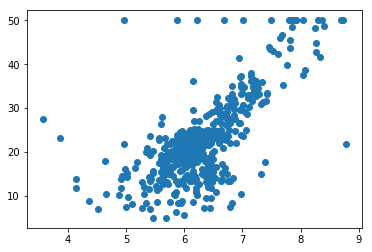

In [15]:
plt.scatter(x, y)

- mean_absolute_error $$loss=\frac{1}{n}\sum|y_i-\hat{y_i}|$$

In [16]:
def mean_absolute_error(y, y_hat):
    return np.abs(y - y_hat).sum() / y.size

$$\frac {\partial loss}{\partial k}=
\begin{cases}
\frac{1}{n}\sum (-x_i), & y_i > \hat{y_i} \\
\frac{1}{n}\sum x_i, & y_i < \hat{y_i}
\end{cases}\\$$

$$ \frac{\partial loss}{\partial k}=\frac{1}{n}\sum sign(\hat{y_i}-y_i)x_i \\ $$

$$ \frac{\partial loss}{\partial b}=\frac{1}{n}\sum sign(\hat{y_i}-y_i) $$

In [17]:
def get_y_hat(k, b, x):
    return k * x + b

In [18]:
import numpy as np

In [19]:
def fit(x, y, it, lr):
    current_k = current_b = np.random.random()
    
    for i in range(it):
        
        y_hat = get_y_hat(current_k, current_b, x)
        loss = mean_absolute_error(y, y_hat)
        
        if (i+1) % 1000 == 0:
            print("When iteration {it} times, current k is {k}, current b is {b} and the loss is {l}".format(it=i, k=current_k, b=current_b, l=loss))
        
        y_diff_sign = np.sign(y_hat - y)  # sign(y_hat_i - y_i)
        current_k -= lr * (y_diff_sign * x).sum() / y.size
        current_b -= lr * y_diff_sign.sum() / y.size
    
    return current_k, current_b

In [20]:
best_k, best_b = fit(x, y, 10000, 0.1)

When iteration 999 times, current k is 4.065824774900624, current b is -3.4136062527673814 and the loss is 5.268675818538297
When iteration 1999 times, current k is 4.7035733915014, current b is -7.326254474111355 and the loss is 5.111468520066772
When iteration 2999 times, current k is 5.280796316402593, current b is -10.856293999802892 and the loss is 4.983489570081641
When iteration 3999 times, current k is 5.815652047627973, current b is -14.086728782411663 and the loss is 4.876166162754859
When iteration 4999 times, current k is 6.288033470552899, current b is -17.029416529447357 and the loss is 4.787299137372882
When iteration 5999 times, current k is 6.7076737867583835, current b is -19.67052324881445 and the loss is 4.715740185596918
When iteration 6999 times, current k is 7.134055209683376, current b is -22.228230758695315 and the loss is 4.648500389975386
When iteration 7999 times, current k is 7.517154023912604, current b is -24.503724829841435 and the loss is 4.595200467206

In [21]:
y_hat = get_y_hat(best_k, best_b, x)

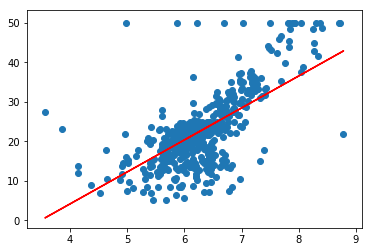

In [22]:
plt.plot(x, y_hat, color="r")
plt.scatter(x, y)

When iteration 999 times, current k is 3.369131190093813, current b is 0.8522089667736056 and the loss is 5.458315659947807
When iteration 999 times, current k is 3.963691814682205, current b is -2.8256234224719377 and the loss is 5.293141386603114
When iteration 999 times, current k is 4.615435191009376, current b is -6.9737430698601495 and the loss is 5.129212592502063
When iteration 999 times, current k is 6.169624085009271, current b is -8.983813662026249 and the loss is 8.613741491448062
When iteration 999 times, current k is 3.3905459229139185, current b is 0.7294359525581272 and the loss is 5.452617707639501
When iteration 1999 times, current k is 3.429497464415948, current b is 0.5042580869454648 and the loss is 5.442172964363242
When iteration 999 times, current k is 3.9934845410644297, current b is -2.989405043915811 and the loss is 5.286306887491994
When iteration 1999 times, current k is 4.571829521301663, current b is -6.548851684232005 and the loss is 5.141772168369521
Wh

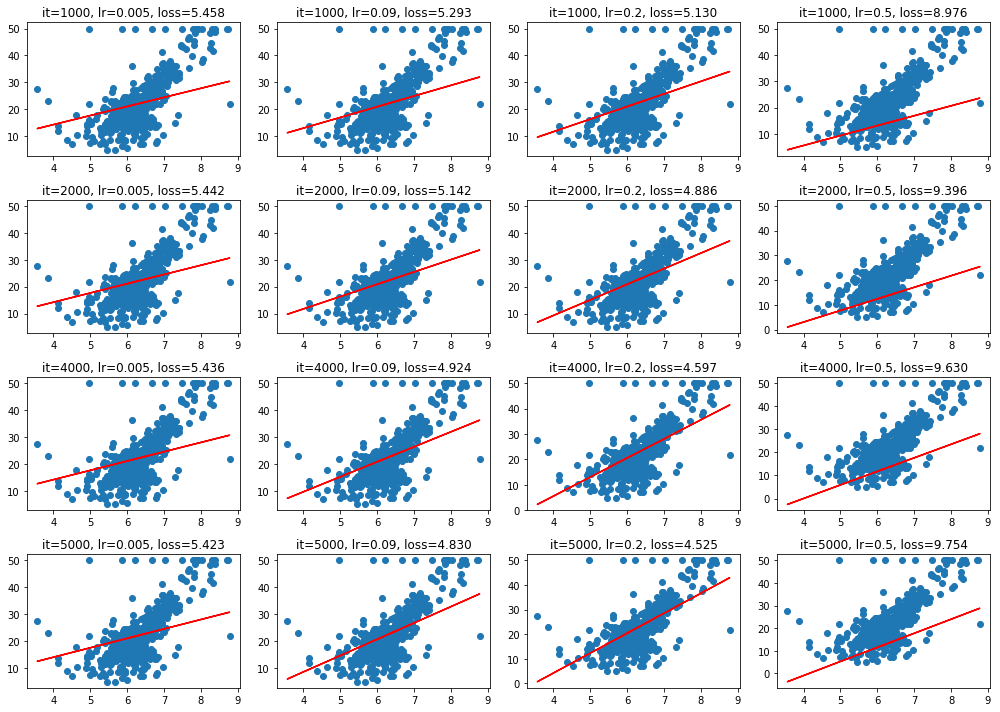

In [25]:
params =[(it, lr) for it in [1000, 2000, 4000, 5000] for lr in [0.005, 0.09, 0.2, 0.5]]
fig, axes = plt.subplots(4, 4, figsize=(14, 10))
for axe, (it, lr) in zip(axes.flatten(), params):
    k, b = fit(x, y, it=it, lr=lr)
    y_hat = get_y_hat(k, b, x)
    loss = mean_absolute_error(y, y_hat)
    
    title = "it={it}, lr={lr}, loss={loss:.3f}".format(it=it, lr=lr, loss=loss)
    axe.set_title(title)
    axe.scatter(x, y)
    axe.plot(x, y_hat, color="red")
fig.tight_layout()    

# Finish the Solution Parse Part of Edit-Distance

- **编辑距离是针对两个字符串（例如英文字）的差异程度的量化量测，量测方式是看至少需要多少次的处理才能将一个字符串变成另一个字符串。**编辑距离可以用在自然语言处理中，例如拼写检查可以根据一个拼错的字和其他正确的字的编辑距离，判断哪一个（或哪几个）是比较可能的字。

- 给定2个字符串a, b。编辑距离是将a转换为b的最少操作次数，操作只允许如下3种：
    - 插入一个字符，例如：fj -> fxj
    - 删除一个字符，例如：fxj -> fj
    - 替换一个字符，例如：jxj -> fyj

In [3]:
from typing import Tuple, List
from functools import lru_cache

In [4]:
def edit_distance(str1: str, str2: str) -> int:
    """Self-thinking"""
    distance = float('inf')
    @lru_cache(maxsize=2**10)
    def helper(str1, str2, dist):
        nonlocal distance
        if not str1 and not str2:
            distance = min(dist, distance)
            return
        if not str1:
            distance = min(dist+len(str2), distance)
            return 
        if not str2:
            distance = min(dist+len(str1), distance)
            return
        if str1[0] == str2[0]:
            helper(str1[1:], str2[1:], dist)
        else:
            helper(str1, str2[1:], dist+1) # 删除 str2 中的第一个字母
            helper(str1[1:], str2[1:], dist+1) # 替换 str2 的第一个字母为 str1 的第一个字母
            helper(str1[1:], str2, dist+1) # 将 str1 的第一个字母插入到 str2 的第一个位置
    helper(str1, str2, 0)
    return distance

In [5]:
str1 = 'ago'
str2 = 'got'
edit_distance(str1, str2)

2

In [6]:
# 记录最佳转换路径
def edit_distance(str1: str, str2: str) -> Tuple[int, str]:
    """Self-thinking"""
    distance = float('inf')
    best_route = ''
    def helper(str1: str, str2: str, dist: int, tmp: List[str]) -> None:
        nonlocal distance, best_route
        if not str1 and not str2:
            if dist < distance:
                distance = dist
                best_route = '->'.join(tmp)
            return
        if not str1:
            if dist + len(str2) < distance:
                distance = dist + len(str2)
                best_route = '->'.join(tmp+[str2 + ' ' + str2])
            return 
        if not str2:
            if dist + len(str1) < distance:
                distance = dist + len(str1)
                best_route = '->'.join(tmp+[str1 + ' ' + str1])
            return
        if str1[0] == str2[0]:
            helper(str1[1:], str2[1:], dist, tmp+[str1+' '+str2])
        else:
            helper(str1, str2[1:], dist+1, tmp+[str1+' '+str2]) # 删除 str2 中的第一个字母
            helper(str1[1:], str2[1:], dist+1, tmp+[str1+' '+str2]) # 替换 str2 的第一个字母为 str1 的第一个字母
            helper(str1[1:], str2, dist+1, tmp+[str1+' '+str2]) # 将 str1 的第一个字母插入到 str2 的第一个位置
    helper(str1, str2, 0, [])
    return distance, best_route

In [7]:
str1 = 'ago'
str2 = 'got'
edit_distance(str1, str2)

(2, 'ago got->go got->o ot->t t')

- **老师的做法**

In [8]:
def edit_distance(string1: str, string2:str) -> int:
    solutions = {}
    @lru_cache(maxsize=2**10)
    def helper(string1: str, string2:str) -> int:
        if len(string1) == 0: 
            solutions[(string1, string2)] = 'ADD ' + string2
            return len(string2)
        if len(string2) == 0: 
            solutions[(string1, string2)] = 'DEL ' + string1
            return len(string1)

        tail_s1 = string1[-1]
        tail_s2 = string2[-1]

        candidates = [
            (helper(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)), # 删除 s1 的尾字母
            (helper(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)), # 添加 s2 的尾字母到 s1 的尾部
        ]

        if tail_s1 == tail_s2:
            both_forward = (helper(string1[:-1], string2[:-1]), '')
        else:
            both_forward = (helper(string1[:-1], string2[:-1])+1, 'SUB {} => {}'.format(tail_s1, tail_s2))

        candidates.append(both_forward)

        min_distance, operation = min(candidates)

        solutions[(string1, string2)] = operation

        return min_distance
    return helper(string1, string2), solutions

In [9]:
string1 = 'ago'
string2 = 'got'
distance, solutions = edit_distance(string1, string2)

In [10]:
solutions

{('', ''): 'ADD ',
 ('', 'g'): 'ADD g',
 ('', 'go'): 'ADD go',
 ('', 'got'): 'ADD got',
 ('a', ''): 'DEL a',
 ('a', 'g'): 'SUB a => g',
 ('a', 'go'): 'ADD o',
 ('a', 'got'): 'ADD t',
 ('ag', ''): 'DEL ag',
 ('ag', 'g'): '',
 ('ag', 'go'): 'ADD o',
 ('ag', 'got'): 'ADD t',
 ('ago', ''): 'DEL ago',
 ('ago', 'g'): 'DEL o',
 ('ago', 'go'): '',
 ('ago', 'got'): 'ADD t'}

In [11]:
def parse_solutions(solutions: dict, string1: str, string2: str) -> str:
    route = []
    def helper(solutions: dict, string1: str, string2: str) -> None:
        if not string1 and not string2: return
        operation = solutions[(string1, string2)]
        route.append('{k}: {v}'.format(k=(string1, string2), v=operation))
        if operation.startswith('SUB') or operation == '':
            helper(solutions, string1[:-1], string2[:-1])
        elif operation.startswith('ADD'):
            helper(solutions, string1, string2[:-1])
        elif operation.startswith('DEL'):
            helper(solutions, string1[:-1], string2)
    helper(solutions, string1, string2)
    return '->'.join(route)

In [12]:
parse_solutions(solutions, string1, string2)

"('ago', 'got'): ADD t->('ago', 'go'): ->('ag', 'g'): ->('a', ''): DEL a"

In [13]:
string1 = 'beijing'
string2 = 'biejin'
dist, solutions = edit_distance(string1, string2)
dist, solutions

(3,
 {('', ''): 'ADD ',
  ('', 'b'): 'ADD b',
  ('', 'bi'): 'ADD bi',
  ('', 'bie'): 'ADD bie',
  ('', 'biej'): 'ADD biej',
  ('', 'bieji'): 'ADD bieji',
  ('', 'biejin'): 'ADD biejin',
  ('b', ''): 'DEL b',
  ('b', 'b'): '',
  ('b', 'bi'): 'ADD i',
  ('b', 'bie'): 'ADD e',
  ('b', 'biej'): 'ADD j',
  ('b', 'bieji'): 'ADD i',
  ('b', 'biejin'): 'ADD n',
  ('be', ''): 'DEL be',
  ('be', 'b'): 'DEL e',
  ('be', 'bi'): 'SUB e => i',
  ('be', 'bie'): '',
  ('be', 'biej'): 'ADD j',
  ('be', 'bieji'): 'ADD i',
  ('be', 'biejin'): 'ADD n',
  ('bei', ''): 'DEL bei',
  ('bei', 'b'): 'DEL i',
  ('bei', 'bi'): '',
  ('bei', 'bie'): 'ADD e',
  ('bei', 'biej'): 'SUB i => j',
  ('bei', 'bieji'): '',
  ('bei', 'biejin'): 'ADD n',
  ('beij', ''): 'DEL beij',
  ('beij', 'b'): 'DEL j',
  ('beij', 'bi'): 'DEL j',
  ('beij', 'bie'): 'SUB j => e',
  ('beij', 'biej'): '',
  ('beij', 'bieji'): 'ADD i',
  ('beij', 'biejin'): 'SUB j => n',
  ('beiji', ''): 'DEL beiji',
  ('beiji', 'b'): 'DEL i',
  ('beiji', 'b

In [14]:
parse_solutions(solutions, string1, string2)

"('beijing', 'biejin'): DEL g->('beijin', 'biejin'): ->('beiji', 'bieji'): ->('beij', 'biej'): ->('bei', 'bie'): ADD e->('bei', 'bi'): ->('be', 'b'): DEL e->('b', 'b'): "

# Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> Most books you may find in [our github](https://github.com/Computing-Intelligence/References)

## Review machine learning

### Why do we use Derivative / Gredient to fit a target function?¶

- 因为日度指明了目标函数的增长方向，这也就指明了目标函数朝哪个方向下降最快。我们的参数通过梯度更新，每一步都在减小目标函数的值，这正是我们希望看到的。

### In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

- “梯度”是指目标函数的单数即目标函数增长最快的方向；“下降”指的是参数通过负梯度更新，达到以目标函数减小最快的方向更新参数的目的。

### What's the advantages of the 3rd gradient descent method compared to the previous methods?

- 第一种方法没有方向，需要大量的资源才能得到合适的k和b。第二种方法有方向，但并不总是正确的。此外，第三种方法，有明确的方向和有效的前进。

### Using the simple words to describe: What's the machine leanring.¶

- 输入数据对和学习方法以及输出数据对之间的映射关系。

## Answer following questions: 

### Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme? 

- 动态规划一般用于解决多阶段最优化决策问题，它充分利用了这类问题的几个特点，最优子结构、重复子问题和无后效性；如果不利用这些特征进行暴力搜索，算法复杂度会特别高，效率低下；利用好这几点的动态规划大大减少了计算重复。前面所讲的搜索问题每一步的选择会对后面的选择产生影响，并且如果要在全局上拿到最优解则没有所谓的最优子结构，是在暴力搜索的基础上进行了一定的剪枝。[参考链接](https://www.zhihu.com/question/23995189/answer/613096905)

### Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

- 同一个动态规划问题不同的输入和输出之间不具有一个通用的映射关系。

### Can you catch up at least 3 problems which could solved by Dynamic Programming? 

- 最短路径问题、分词问题、编辑距离。

### Can you catch up at least 3 problems wich could sloved by Edit Distance? 

- 语音识别、拼写纠错、评估机器翻译

### Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

- 最优子结构：问题的最优解可由当前阶段的最优解推得；
- 无后效性：在推导后面阶段的状态的时候，只关心前面阶段的状态值，并不关心这个状态怎么来的；某阶段状态一旦确定则不受之后决策阶段的影响；
- 重复子问题：不同的搜索序列中间会存在重复的状态。

### What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

- 没有统一标准的模型，不同的问题不同的解法，只是一类思想；当数据维度较高时，空间复杂度可能会很高。

# Preparation of Project-01

## Using python Flask or Bottle to finish your first simple web app:

> https://bottlepy.org/

## Learn what's the SQL, and try some simple SQL operations:

> https://www.w3schools.com/sql/sql_intro.asp

## Learn what's the HTML ( *ONLY* need to know the basic things)

> https://getbootstrap.com/; https://www.w3schools.com/html/

# (Optinal) Finish the k-person-salesman problem

- **旅行商问题(Traveling Salesman Problem, TSP)**是旅行商要到若干个城市旅行，各城市之间的费用是已知的，为了节省费用，旅行商决定从所在城市出发，到每个城市旅行一次后返回初始城市，问他应选择什么样的路线才能使所走的总费用最短？

In [18]:
import random
import matplotlib.pylab as plt

In [23]:
%matplotlib inline

In [19]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]
coordinate = list(zip(latitudes,longitudes)) #给出坐标
len(latitudes),coordinate[0]

(20, (-53, 96))

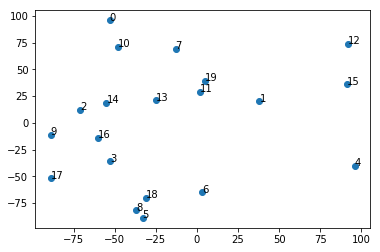

In [24]:
fig, ax = plt.subplots()

ax.scatter(latitudes, longitudes)

for i in range(len(longitudes)):
    ax.annotate(i, (latitudes[i], longitudes[i]))

In [21]:
from typing import List, Tuple
from copy import deepcopy
import numpy as np

def get_distance(x: tuple, y: tuple) -> float:
    return np.sqrt((x[0]-y[0])**2 + (x[-1]-y[-1])**2)
def tsp(coordinates: List[Tuple[int, int]], start: int=0) -> np.float64:
    length = len(coordinates)
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    opt = [[[i], i, all_distances[frozenset([start, i])]] for i in range(length) if i != start]
    while len(opt[0][0]) < length-1:
        opt_n = []
        for j in range(length):
            if j == start: continue
            tmp = [None, j, float('inf')]
            for visited, cur, dist in opt:
                if j in visited: continue
                tmp_dist = all_distances[frozenset([cur, j])]
                if tmp_dist + dist < tmp[-1]:
                    tmp[0] = visited + [j]
                    tmp[-1] = tmp_dist + dist
            if tmp[0]: opt_n.append(deepcopy(tmp))
        opt = opt_n
    min_distance = float('inf')
    route = None
    for visited, cur, dist in opt:
        tmp_dist = all_distances[frozenset([cur, start])] + dist
        if tmp_dist < min_distance:
            min_distance = tmp_dist
            route = visited
    return min_distance, route

In [22]:
tsp(coordinate)

(847.7739042637943,
 [10, 7, 19, 11, 13, 14, 2, 9, 16, 3, 17, 18, 8, 5, 6, 4, 1, 15, 12])

In [25]:
def tsp(coordinates: List[Tuple[int, int]]) -> np.float64:
    tsp.solutions = {}
    length = len(coordinates)
    dp = [[float('inf')] * 2**(length-1) for _ in range(length)]
    # 计算所有城市两两之间的距离
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i == 0: continue
        dp[i][0] = all_distances[frozenset([i, 0])]
    for j in range(1, len(dp[0])):
        for i in range(length):
            if i != 0 and (j >> (i - 1)) & 1 == 1: # 出发的城市在要经过的城市里，不合常理
                continue
            tsp.solutions[(i, j)] = (None, None)
            for k in range(1, length):
                if (j >> (k - 1)) & 1 == 0: continue # 不经过该城市则查看下一个城市
                tmp_dist = all_distances[frozenset([i, k])] + dp[k][j ^ (1 << (k - 1))]
                if dp[i][j] > tmp_dist:
                    dp[i][j] = tmp_dist
                    tsp.solutions[(i, j)] = (k, j ^ (1 << (k - 1)))
    return dp[0][-1]

In [26]:
tsp(coordinate)

788.1119500567335

In [27]:
def parse_solutions(length: int, solutions: dict) -> str:
    route = ['0']
    def helper(row: int, col: int) -> None:
        i, j = solutions[(row, col)]
        route.append(str(i))
        if j == 0: return
        helper(i, j)
    helper(0, 2**(length-1)-1)
    route.append('0')
    return route

def pretty_print(route: List[str]) -> str:
    print('->'.join(route))

In [28]:
pretty_print(parse_solutions(len(coordinate), tsp.solutions))

0->10->13->14->2->9->16->3->17->8->5->18->6->4->15->12->1->11->19->7->0


- **加油**